In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

In [ ]:
#tf.keras.__version__

In [37]:
data = pd.read_csv("heart_attack_prediction_dataset (1).csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   sys0                             8763 non-null   int64  
 5   dys0                             8763 non-null   int64  
 6   sys1                             8763 non-null   int64  
 7   dys1                             8763 non-null   int64  
 8   sys2                             8763 non-null   int64  
 9   dys2                             8763 non-null   int64  
 10  sys3                             8763 non-null   int64  
 11  dys3                             8763 non-null   int64  
 12  Heart Rate          

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.columns

In [38]:
# ctg_data = data[['Sex','Diet','Hemisphere']]
data = pd.get_dummies(data, columns = ['Sex','Diet','Hemisphere'])
# data = pd.get_dummies(data, columns = ['Country','Continent','Hemisphere'])

In [39]:
data.drop(data.iloc[:,0:1],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   sys0                             8763 non-null   int64  
 3   dys0                             8763 non-null   int64  
 4   sys1                             8763 non-null   int64  
 5   dys1                             8763 non-null   int64  
 6   sys2                             8763 non-null   int64  
 7   dys2                             8763 non-null   int64  
 8   sys3                             8763 non-null   int64  
 9   dys3                             8763 non-null   int64  
 10  Heart Rate                       8763 non-null   int64  
 11  Diabetes                         8763 non-null   int64  
 12  Family History      

In [41]:
# sex_map = {'Male':1,'Female':0,1:1,0:0}
# data['Sex']=data['Sex'].map(sex_map)
# diet_map = {'Healthy':2,'Average':1,'Unhealthy':0,2:2,1:1,0:0}
# data['Diet'] = data['Diet'].map(diet_map)
# sphere_map = {'Southern Hemisphere':0,'Northern Hemisphere':1,1:1,0:0}
# data["Hemisphere"] = data["Hemisphere"].map(sphere_map)
# data.info()

In [42]:
# cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
# cat_columns = ['Sex_Female','Sex_Male']

data = data.astype(int)

In [ ]:
# plt.figure(figsize=(8, 7))
# for i in ctg_data.columns:
#     ctg_num = ctg_data[i].value_counts()
#     chart = sns.barplot(x = ctg_num.index, y = ctg_num)
#     for p in chart.patches:
#         chart.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points',
#                      fontsize=10)
        
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show() 

In [43]:
data.head()

,Age,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,sys3,dys3,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67,208,158,88,140,112,135,90,131,93,...,0,6,0,0,1,1,0,0,0,1
1,21,389,165,93,130,112,133,114,133,115,...,1,7,0,0,1,0,0,1,1,0
2,21,324,174,99,134,115,133,112,135,102,...,4,4,0,1,0,0,1,0,1,0
3,84,383,163,100,132,92,140,98,133,96,...,3,4,0,0,1,1,0,0,1,0
4,66,318,91,88,140,93,134,116,131,104,...,1,5,0,0,1,0,0,1,1,0


In [45]:
data.columns

Index(['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1', 'dys1', 'sys2', 'dys2',
       'sys3', 'dys3', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Sex_Female', 'Sex_Male', 'Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere'],
      dtype='object')

<Axes: >

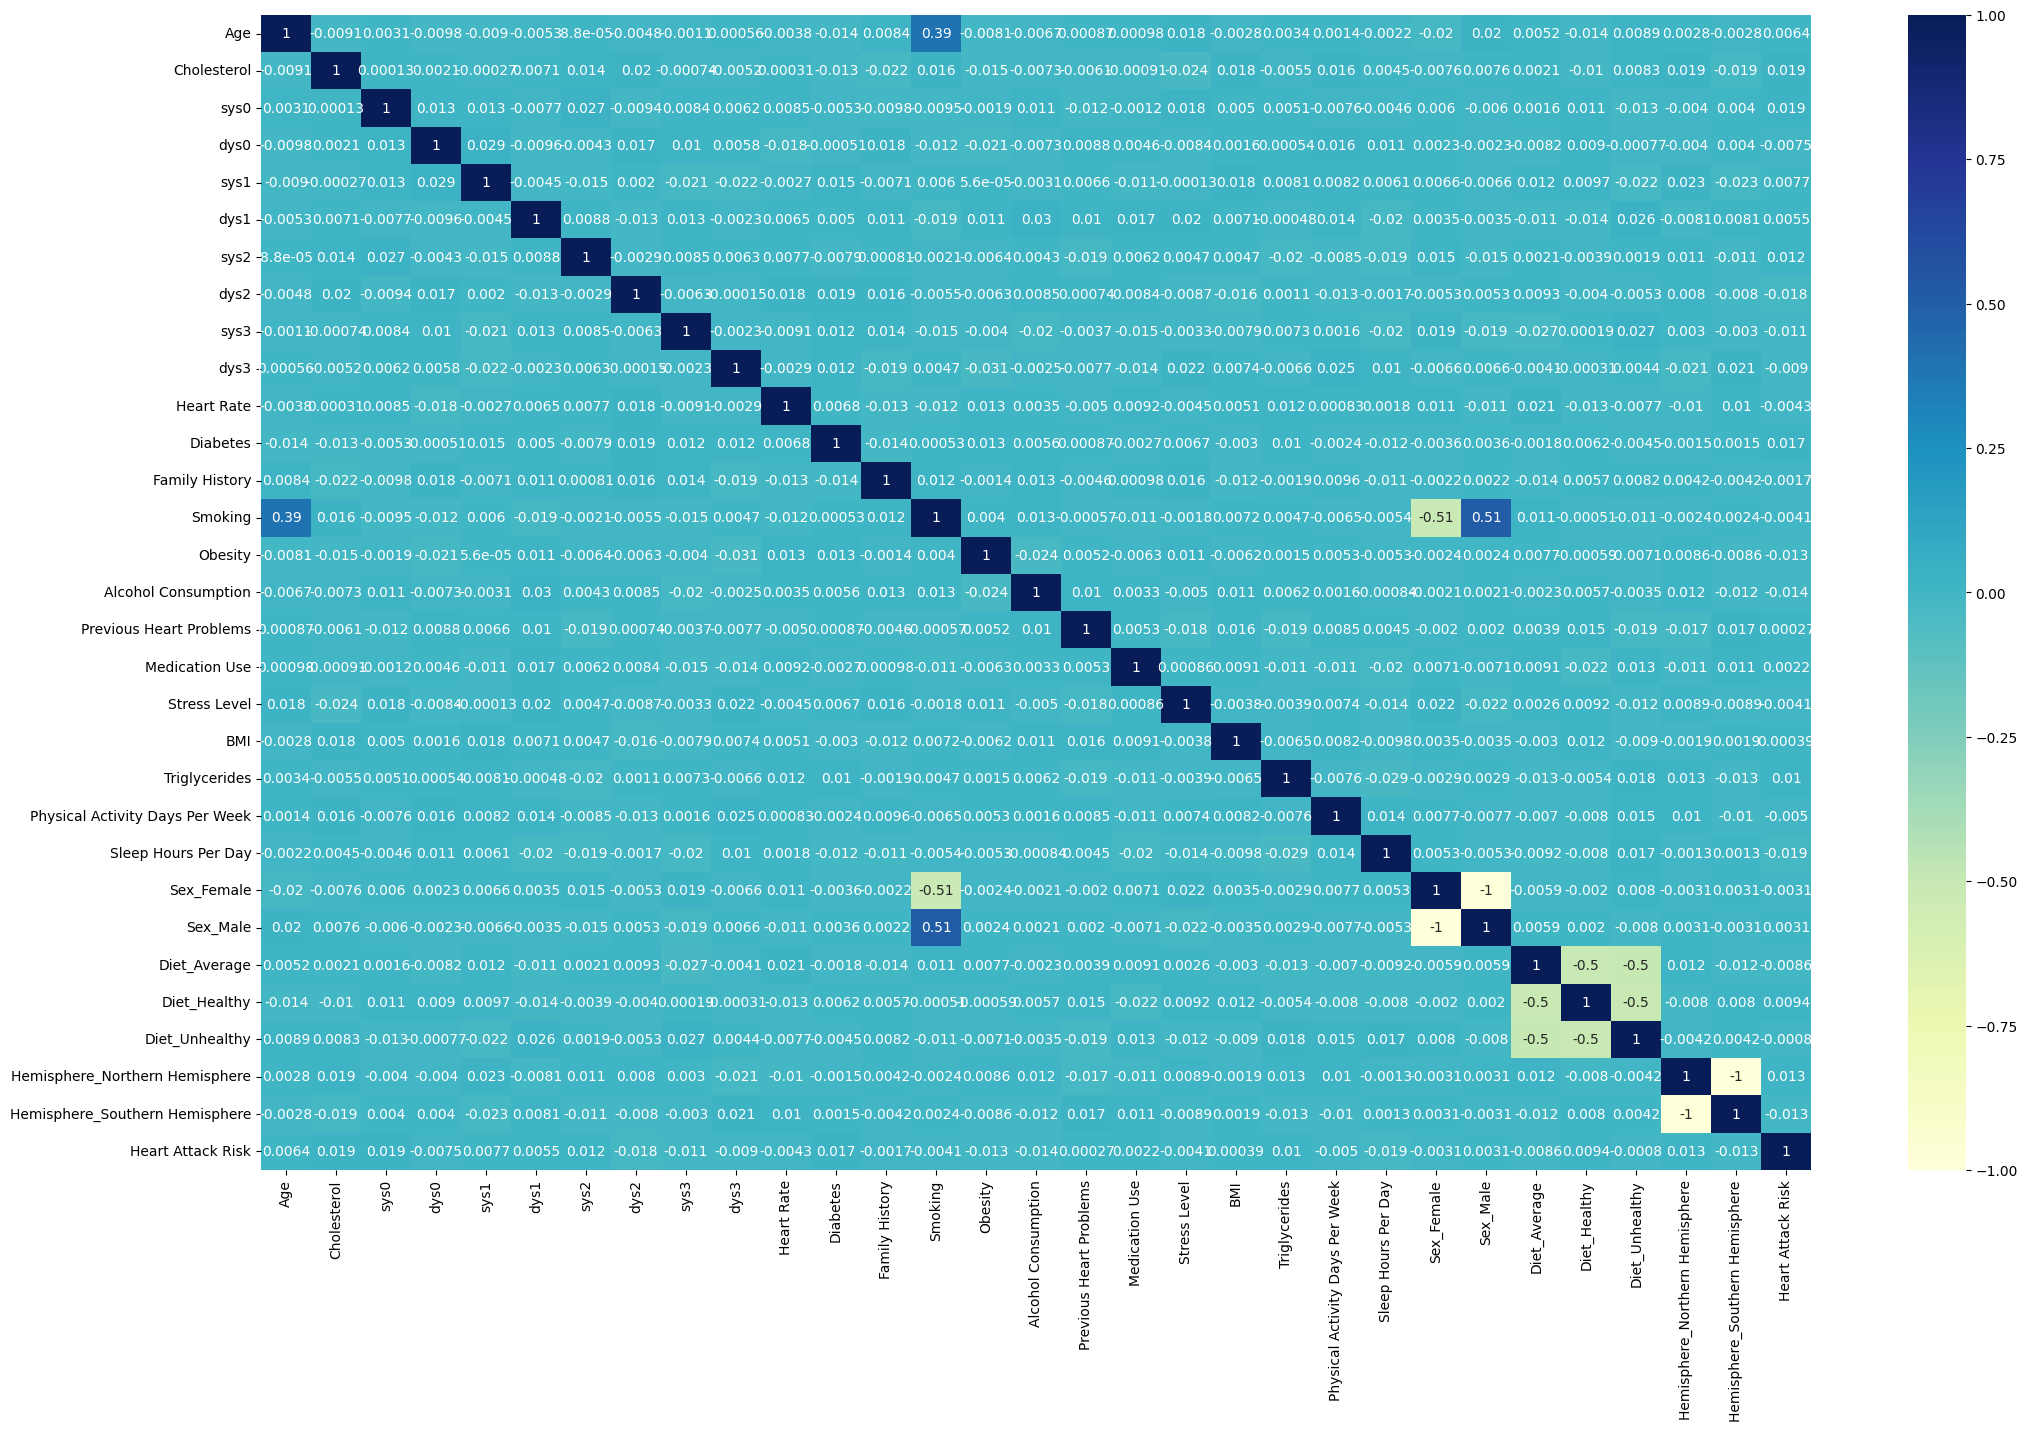

In [46]:
plt.figure(figsize = (25,15))
sns.heatmap(data[['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Sex_Female', 'Sex_Male', 'Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere','Heart Attack Risk']].corr(), 
       cmap="YlGnBu", annot=True)

In [47]:
data.dtypes

Age                                int32
Cholesterol                        int32
sys0                               int32
dys0                               int32
sys1                               int32
dys1                               int32
sys2                               int32
dys2                               int32
sys3                               int32
dys3                               int32
Heart Rate                         int32
Diabetes                           int32
Family History                     int32
Smoking                            int32
Obesity                            int32
Alcohol Consumption                int32
Previous Heart Problems            int32
Medication Use                     int32
Stress Level                       int32
BMI                                int32
Triglycerides                      int32
Physical Activity Days Per Week    int32
Sleep Hours Per Day                int32
Heart Attack Risk                  int32
Sex_Female      

In [48]:
data.columns

Index(['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1', 'dys1', 'sys2', 'dys2',
       'sys3', 'dys3', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Sex_Female', 'Sex_Male', 'Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere'],
      dtype='object')

In [49]:
X = data [['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day',  'Sex_Female', 'Sex_Male', 'Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere']]
Y = data [['Heart Attack Risk']]
#X=X.dropna(how='any')
X.head(20)

,Age,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,sys3,dys3,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67,208,158,88,140,112,135,90,131,93,...,286,0,6,0,1,1,0,0,0,1
1,21,389,165,93,130,112,133,114,133,115,...,235,1,7,0,1,0,0,1,1,0
2,21,324,174,99,134,115,133,112,135,102,...,587,4,4,1,0,0,1,0,1,0
3,84,383,163,100,132,92,140,98,133,96,...,378,3,4,0,1,1,0,0,1,0
4,66,318,91,88,140,93,134,116,131,104,...,231,1,5,0,1,0,0,1,1,0
5,54,297,172,86,139,119,130,115,139,103,...,795,5,10,1,0,0,0,1,1,0
6,90,358,102,73,130,97,132,97,136,92,...,284,4,10,0,1,0,1,0,1,0
7,84,220,131,68,135,120,131,117,130,98,...,370,6,7,0,1,1,0,0,1,0
8,20,145,144,105,133,90,135,107,138,100,...,790,7,4,0,1,1,0,0,0,1
9,43,248,160,70,131,112,132,93,138,117,...,232,7,7,1,0,0,0,1,1,0


In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))

In [51]:
model.compile(loss="BinaryCrossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [52]:
history = model.fit(X, Y, epochs=30)

Epoch 1/30
274/274 [==============================] - 3s 6ms/step - loss: 2.0106 - accuracy: 0.3582
Epoch 2/30
274/274 [==============================] - 1s 5ms/step - loss: 0.6561 - accuracy: 0.3582
Epoch 3/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6539 - accuracy: 0.3582
Epoch 4/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6536 - accuracy: 0.3582
Epoch 5/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6531 - accuracy: 0.3582
Epoch 6/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6529 - accuracy: 0.3582
Epoch 7/30
274/274 [==============================] - 2s 6ms/step - loss: 0.6525 - accuracy: 0.3582
Epoch 8/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.3582
Epoch 9/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.3582
Epoch 10/30
274/274 [==============================] - 1s 4ms/step - loss: 0.6546 - accuracy: 0.3582